In [102]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# samples like: $5 / 1 * 1 + 4 + 3 + 2 / 9 / 4 * 2 / 4$	1 2 3 4 5 6 7 8 9 10 1 2 3 4 5 6 7 8

In [103]:
seq = '5/1∗1+4+3+2/9/4∗2/4'

In [104]:
syn_dis = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8]

In [105]:
seq_len = len(seq)

In [106]:
seq_len

19

In [107]:
npops = np.array(list(range(6)) + list(range(6))) 

In [108]:
prob_action = {i:[] for i in range(seq_len)}
mem = {i:[] for i in range(seq_len)}

In [149]:
i = 0
with open('feval-analy_d10-sarnn.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        if 'all' not in line_json:
            continue
        
        prob_action[i].append(line_json['all'])
        mem[i].append(line_json['mem'])
        i += 1
        i %= seq_len

In [150]:
len(prob_action[0])

130

In [153]:
remain = 4
step = []
for i in range(seq_len):
    step.append(np.array(mem[i]))
mean_mem_dist = []
for i in range(seq_len):
    mean_mem_dist.append((step[i].sum(0)/step[i].shape[0])[:, :remain])

In [154]:
mean_mem_dist[0]

array([[0.43528111, 0.2296787 , 0.05869691, 0.06714707],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [155]:
mean_mem_dist[1]

array([[ 0.06224328,  0.5880698 , -0.03444408, -0.11043403],
       [ 0.21213642,  0.04298453,  0.10495862, -0.05425035],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [156]:
for i in range(seq_len):
    mean_mem_dist[i] = np.hstack([mean_mem_dist[i], np.ones((5, 1))])
mem_whole = np.hstack(mean_mem_dist)

In [157]:
mem_whole.shape

(5, 95)

'a'

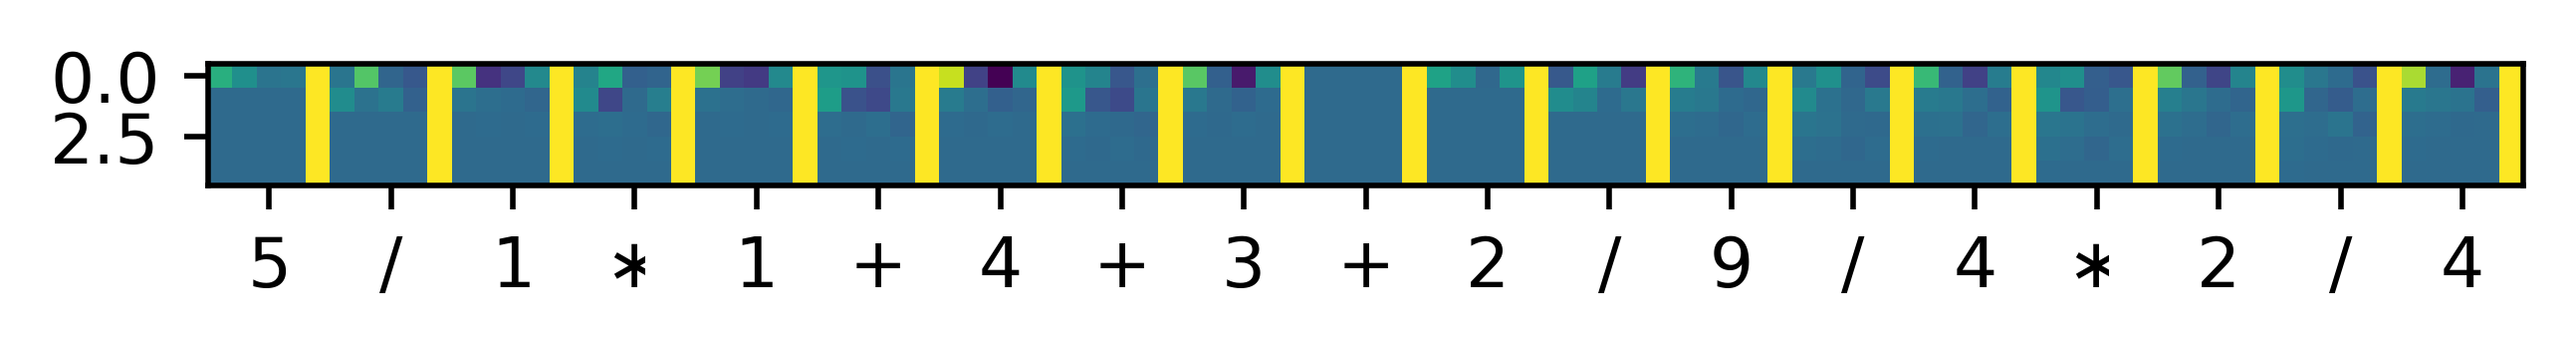

In [161]:
fig, ax = plt.subplots()
fig.dpi = 500
plt.imshow(mem_whole)
plt.xticks(np.arange(2, mem_whole.shape[1], 5), list(seq))
'a'

# l/r : fraction of gates that are left/right saturated

In [66]:
in_l = {i:0 for i in range(seq_len)} 
in_r = {i:0 for i in range(seq_len)}
forget_l = {i:0 for i in range(seq_len)}
forget_r = {i:0 for i in range(seq_len)}
out_l = {i:0 for i in range(seq_len)}
out_r = {i:0 for i in range(seq_len)}
ngates = 0

In [67]:
i = 0
with open('feval-analy_d10-sarnn_lstm.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        t = line_json['t']
        ngates += 100
        for in_gate in line_json['i']:
            if in_gate > 0.9:
                in_r[t] += 1
            elif in_gate < 0.1:
                in_l[t] += 1
        
        for f_gate in line_json['f']:
            if f_gate > 0.9:
                forget_r[t] += 1
            elif f_gate < 0.1:
                forget_l[t] += 1
        
        for o_gate in line_json['o']:
            if o_gate > 0.9:
                out_r[t] += 1
            elif o_gate < 0.1:
                out_l[t] += 1

In [68]:
ngates = ngates/seq_len

In [69]:
ngates

6500.0

In [70]:
step = []
for i in range(seq_len):
    step.append(np.array(prob_action[i]))

In [71]:
mean_dist = []
for i in range(seq_len):
    mean_dist.append(step[i].sum(0)/step[i].shape[0])

In [72]:
mean_dist[0]

array([3.34815708e-01, 1.81576896e-01, 2.31688363e-01, 5.62658237e-02,
       2.99237452e-02, 4.47011676e-02, 2.14865759e-04, 8.12984221e-02,
       7.63304645e-03, 6.92109999e-03, 2.01020754e-03, 2.29506503e-02])

In [73]:
step = []
for i in range(seq_len):
    step.append(np.array(mem[i]))

In [74]:
mean_mem_dist = []
for i in range(seq_len):
    mean_mem_dist.append(step[i].sum(0)/step[i].shape[0])

In [77]:
for i in range(seq_len):
    mean_mem_dist[i] = np.vstack([mean_mem_dist[i], np.zeros((1, 100))])
mem_whole = np.vstack(mean_mem_dist)

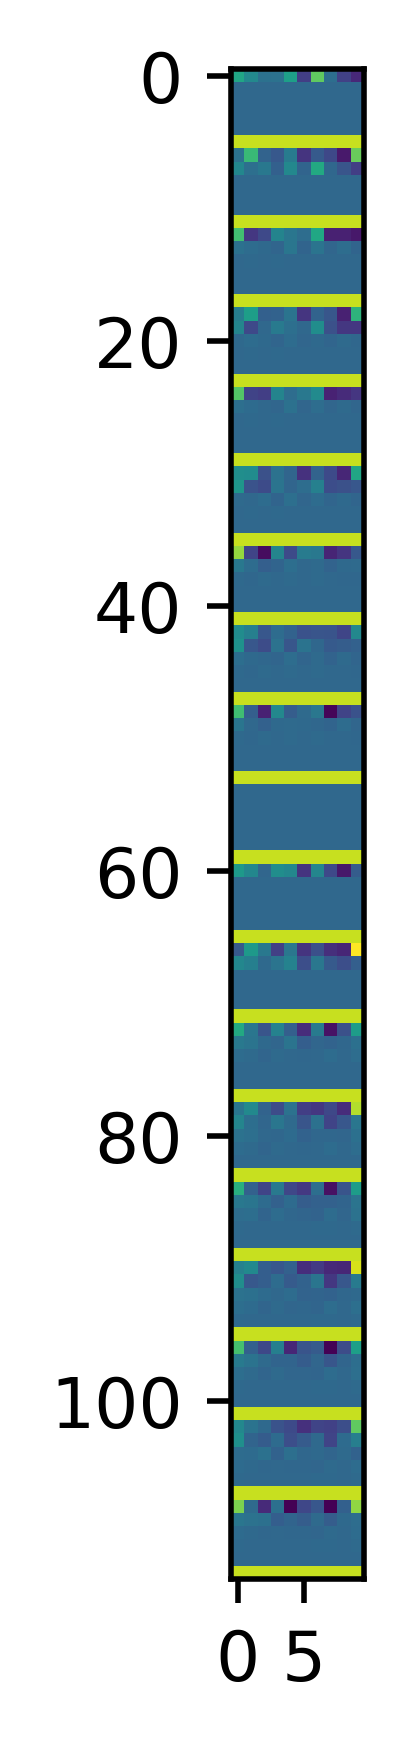

In [79]:
fig, ax = plt.subplots()
fig.dpi = 500
plt.imshow(mem_whole[:, :10])

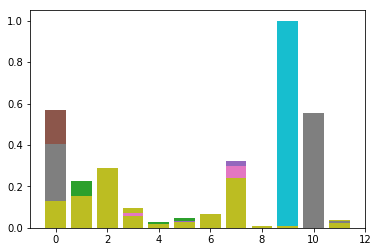

In [59]:
for i in range(seq_len):
    plt.bar(np.arange(12), mean_dist[i])

in_l: 0.40923076923076923
in_r: 0.2323076923076923
forget_l: 0.45384615384615384
forget_r: 0.16846153846153847
out_l: 0.4416923076923077
out_r: 0.1733846153846154


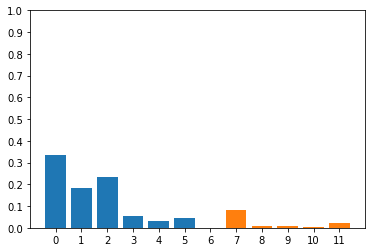

In [18]:
plt.bar(np.arange(6), mean_dist[0][:6])
plt.bar(np.arange(6, 12), mean_dist[0][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[0]/ngates)
print('in_r:', in_r[0]/ngates)
print('forget_l:', forget_l[0]/ngates)
print('forget_r:', forget_r[0]/ngates)
print('out_l:', out_l[0]/ngates)
print('out_r:', out_r[0]/ngates)

in_l: 0.6213846153846154
in_r: 0.28307692307692306
forget_l: 0.5309230769230769
forget_r: 0.35092307692307695
out_l: 0.5567692307692308
out_r: 0.328


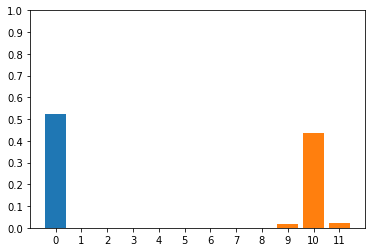

In [60]:
plt.bar(np.arange(6), mean_dist[1][:6])
plt.bar(np.arange(6, 12), mean_dist[1][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[1]/ngates)
print('in_r:', in_r[1]/ngates)
print('forget_l:', forget_l[1]/ngates)
print('forget_r:', forget_r[1]/ngates)
print('out_l:', out_l[1]/ngates)
print('out_r:', out_r[1]/ngates)

in_l: 0.6129230769230769
in_r: 0.182
forget_l: 0.43646153846153846
forget_r: 0.3047692307692308
out_l: 0.4706153846153846
out_r: 0.2670769230769231


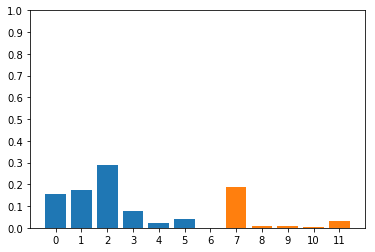

In [61]:
plt.bar(np.arange(6), mean_dist[2][:6])
plt.bar(np.arange(6, 12), mean_dist[2][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[2]/ngates)
print('in_r:', in_r[2]/ngates)
print('forget_l:', forget_l[2]/ngates)
print('forget_r:', forget_r[2]/ngates)
print('out_l:', out_l[2]/ngates)
print('out_r:', out_r[2]/ngates)

in_l: 0.6230769230769231
in_r: 0.276
forget_l: 0.5644615384615385
forget_r: 0.3090769230769231
out_l: 0.5593846153846154
out_r: 0.3213846153846154


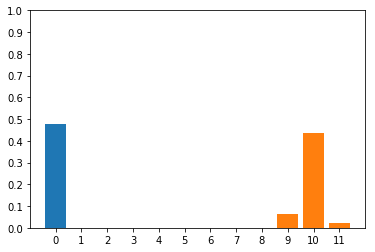

In [62]:
plt.bar(np.arange(6), mean_dist[3][:6])
plt.bar(np.arange(6, 12), mean_dist[3][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[3]/ngates)
print('in_r:', in_r[3]/ngates)
print('forget_l:', forget_l[3]/ngates)
print('forget_r:', forget_r[3]/ngates)
print('out_l:', out_l[3]/ngates)
print('out_r:', out_r[3]/ngates)

in_l: 0.6007692307692307
in_r: 0.17476923076923076
forget_l: 0.44246153846153846
forget_r: 0.28984615384615386
out_l: 0.48538461538461536
out_r: 0.2621538461538461


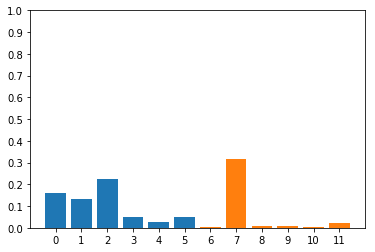

In [63]:
plt.bar(np.arange(6), mean_dist[4][:6])
plt.bar(np.arange(6, 12), mean_dist[4][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[4]/ngates)
print('in_r:', in_r[4]/ngates)
print('forget_l:', forget_l[4]/ngates)
print('forget_r:', forget_r[4]/ngates)
print('out_l:', out_l[4]/ngates)
print('out_r:', out_r[4]/ngates)

in_l: 0.6096923076923076
in_r: 0.28907692307692306
forget_l: 0.5869230769230769
forget_r: 0.27984615384615386
out_l: 0.5441538461538461
out_r: 0.3363076923076923


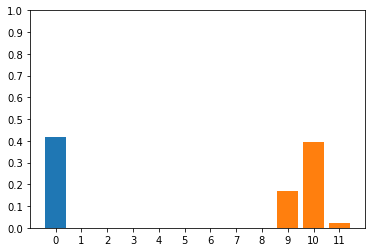

In [64]:
plt.bar(np.arange(6), mean_dist[5][:6])
plt.bar(np.arange(6, 12), mean_dist[5][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[5]/ngates)
print('in_r:', in_r[5]/ngates)
print('forget_l:', forget_l[5]/ngates)
print('forget_r:', forget_r[5]/ngates)
print('out_l:', out_l[5]/ngates)
print('out_r:', out_r[5]/ngates)

in_l: 0.5696923076923077
in_r: 0.1930769230769231
forget_l: 0.4672307692307692
forget_r: 0.27384615384615385
out_l: 0.494
out_r: 0.2553846153846154


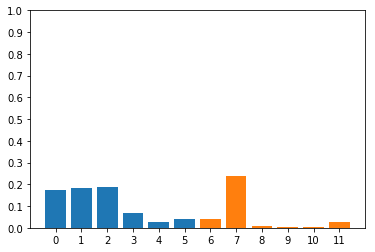

In [65]:
t=6
plt.bar(np.arange(6), mean_dist[t][:6])
plt.bar(np.arange(6, 12), mean_dist[t][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[t]/ngates)
print('in_r:', in_r[t]/ngates)
print('forget_l:', forget_l[t]/ngates)
print('forget_r:', forget_r[t]/ngates)
print('out_l:', out_l[t]/ngates)
print('out_r:', out_r[t]/ngates)

in_l: 0.5598461538461539
in_r: 0.34723076923076923
forget_l: 0.6638461538461539
forget_r: 0.22415384615384615
out_l: 0.5023076923076923
out_r: 0.37538461538461537


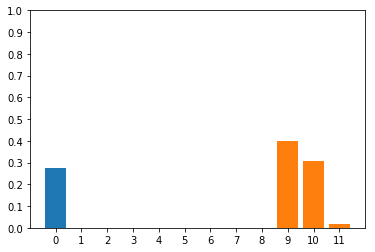

In [66]:
t=7
plt.bar(np.arange(6), mean_dist[t][:6])
plt.bar(np.arange(6, 12), mean_dist[t][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[t]/ngates)
print('in_r:', in_r[t]/ngates)
print('forget_l:', forget_l[t]/ngates)
print('forget_r:', forget_r[t]/ngates)
print('out_l:', out_l[t]/ngates)
print('out_r:', out_r[t]/ngates)

in_l: 0.5049230769230769
in_r: 0.2236923076923077
forget_l: 0.5089230769230769
forget_r: 0.24215384615384616
out_l: 0.4996923076923077
out_r: 0.22076923076923077


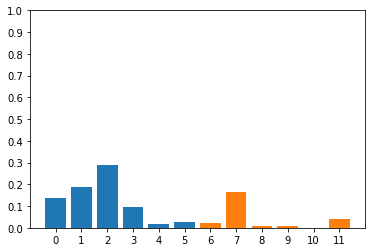

In [67]:
t=8
plt.bar(np.arange(6), mean_dist[t][:6])
plt.bar(np.arange(6, 12), mean_dist[t][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[t]/ngates)
print('in_r:', in_r[t]/ngates)
print('forget_l:', forget_l[t]/ngates)
print('forget_r:', forget_r[t]/ngates)
print('out_l:', out_l[t]/ngates)
print('out_r:', out_r[t]/ngates)

in_l: 0.4306153846153846
in_r: 0.4803076923076923
forget_l: 0.8381538461538461
forget_r: 0.09523076923076923
out_l: 0.4146153846153846
out_r: 0.4644615384615385


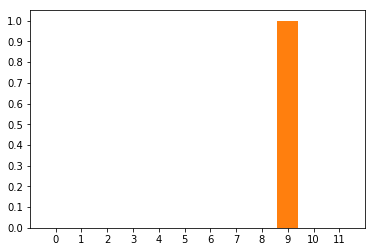

In [68]:
t=9
plt.bar(np.arange(6), mean_dist[t][:6])
plt.bar(np.arange(6, 12), mean_dist[t][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[t]/ngates)
print('in_r:', in_r[t]/ngates)
print('forget_l:', forget_l[t]/ngates)
print('forget_r:', forget_r[t]/ngates)
print('out_l:', out_l[t]/ngates)
print('out_r:', out_r[t]/ngates)

in_l: 0.37123076923076925
in_r: 0.2913846153846154
forget_l: 0.5990769230769231
forget_r: 0.14815384615384616
out_l: 0.5261538461538462
out_r: 0.17107692307692307


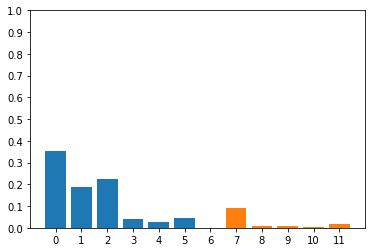

In [69]:
t=10
plt.bar(np.arange(6), mean_dist[t][:6])
plt.bar(np.arange(6, 12), mean_dist[t][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[t]/ngates)
print('in_r:', in_r[t]/ngates)
print('forget_l:', forget_l[t]/ngates)
print('forget_r:', forget_r[t]/ngates)
print('out_l:', out_l[t]/ngates)
print('out_r:', out_r[t]/ngates)

in_l: 0.6310769230769231
in_r: 0.2753846153846154
forget_l: 0.49338461538461537
forget_r: 0.372
out_l: 0.5646153846153846
out_r: 0.314


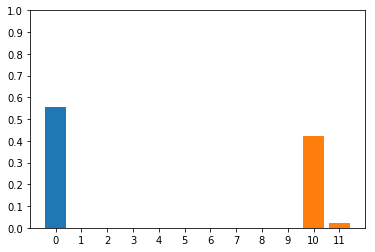

In [70]:
t=11
plt.bar(np.arange(6), mean_dist[t][:6])
plt.bar(np.arange(6, 12), mean_dist[t][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[t]/ngates)
print('in_r:', in_r[t]/ngates)
print('forget_l:', forget_l[t]/ngates)
print('forget_r:', forget_r[t]/ngates)
print('out_l:', out_l[t]/ngates)
print('out_r:', out_r[t]/ngates)

in_l: 0.6450769230769231
in_r: 0.16138461538461538
forget_l: 0.4347692307692308
forget_r: 0.34384615384615386
out_l: 0.4958461538461538
out_r: 0.26676923076923076


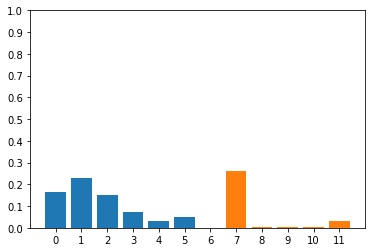

In [71]:
t=12
plt.bar(np.arange(6), mean_dist[t][:6])
plt.bar(np.arange(6, 12), mean_dist[t][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[t]/ngates)
print('in_r:', in_r[t]/ngates)
print('forget_l:', forget_l[t]/ngates)
print('forget_r:', forget_r[t]/ngates)
print('out_l:', out_l[t]/ngates)
print('out_r:', out_r[t]/ngates)

in_l: 0.6453846153846153
in_r: 0.2612307692307692
forget_l: 0.5424615384615384
forget_r: 0.3261538461538461
out_l: 0.5541538461538461
out_r: 0.3203076923076923


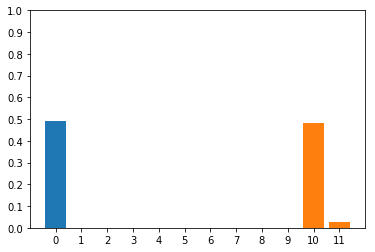

In [72]:
t=13
plt.bar(np.arange(6), mean_dist[t][:6])
plt.bar(np.arange(6, 12), mean_dist[t][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[t]/ngates)
print('in_r:', in_r[t]/ngates)
print('forget_l:', forget_l[t]/ngates)
print('forget_r:', forget_r[t]/ngates)
print('out_l:', out_l[t]/ngates)
print('out_r:', out_r[t]/ngates)

in_l: 0.6343076923076924
in_r: 0.1596923076923077
forget_l: 0.43246153846153845
forget_r: 0.3372307692307692
out_l: 0.5047692307692307
out_r: 0.2510769230769231


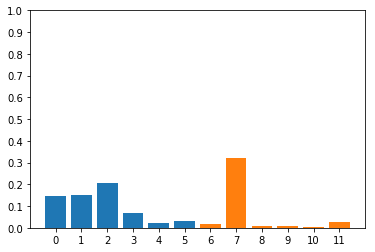

In [73]:
t=14
plt.bar(np.arange(6), mean_dist[t][:6])
plt.bar(np.arange(6, 12), mean_dist[t][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[t]/ngates)
print('in_r:', in_r[t]/ngates)
print('forget_l:', forget_l[t]/ngates)
print('forget_r:', forget_r[t]/ngates)
print('out_l:', out_l[t]/ngates)
print('out_r:', out_r[t]/ngates)

in_l: 0.6569230769230769
in_r: 0.24323076923076922
forget_l: 0.536923076923077
forget_r: 0.3250769230769231
out_l: 0.5807692307692308
out_r: 0.29707692307692307


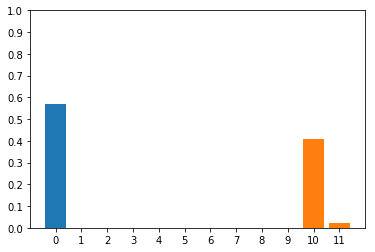

In [74]:
t=15
plt.bar(np.arange(6), mean_dist[t][:6])
plt.bar(np.arange(6, 12), mean_dist[t][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[t]/ngates)
print('in_r:', in_r[t]/ngates)
print('forget_l:', forget_l[t]/ngates)
print('forget_r:', forget_r[t]/ngates)
print('out_l:', out_l[t]/ngates)
print('out_r:', out_r[t]/ngates)

in_l: 0.6446153846153846
in_r: 0.156
forget_l: 0.4481538461538462
forget_r: 0.3290769230769231
out_l: 0.5030769230769231
out_r: 0.25261538461538463


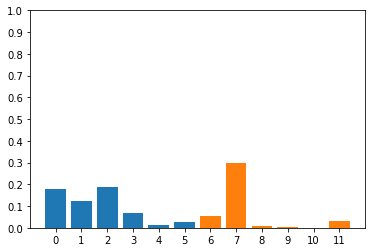

In [75]:
t=16
plt.bar(np.arange(6), mean_dist[t][:6])
plt.bar(np.arange(6, 12), mean_dist[t][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[t]/ngates)
print('in_r:', in_r[t]/ngates)
print('forget_l:', forget_l[t]/ngates)
print('forget_r:', forget_r[t]/ngates)
print('out_l:', out_l[t]/ngates)
print('out_r:', out_r[t]/ngates)

in_l: 0.6507692307692308
in_r: 0.2523076923076923
forget_l: 0.5401538461538462
forget_r: 0.31876923076923075
out_l: 0.5336923076923077
out_r: 0.32953846153846156


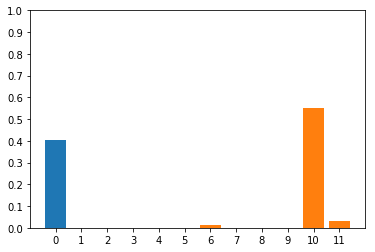

In [76]:
t=17
plt.bar(np.arange(6), mean_dist[t][:6])
plt.bar(np.arange(6, 12), mean_dist[t][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[t]/ngates)
print('in_r:', in_r[t]/ngates)
print('forget_l:', forget_l[t]/ngates)
print('forget_r:', forget_r[t]/ngates)
print('out_l:', out_l[t]/ngates)
print('out_r:', out_r[t]/ngates)

in_l: 0.6323076923076923
in_r: 0.1570769230769231
forget_l: 0.4469230769230769
forget_r: 0.32
out_l: 0.49246153846153845
out_r: 0.2581538461538462


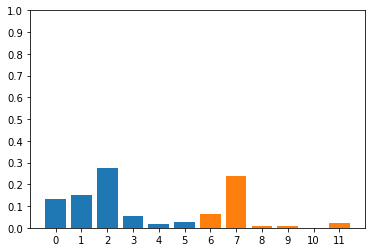

In [77]:
t=18
plt.bar(np.arange(6), mean_dist[t][:6])
plt.bar(np.arange(6, 12), mean_dist[t][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[t]/ngates)
print('in_r:', in_r[t]/ngates)
print('forget_l:', forget_l[t]/ngates)
print('forget_r:', forget_r[t]/ngates)
print('out_l:', out_l[t]/ngates)
print('out_r:', out_r[t]/ngates)

In [32]:
push = [mean_dist[t][6:].sum() for t in range(seq_len)]

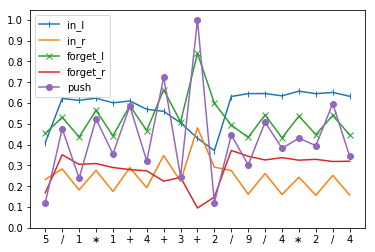

In [33]:
plt.plot(np.arange(seq_len), 
         np.array([in_l[i] for i in in_l.keys()])/ngates,
        label='in_l', marker='|')
plt.plot(np.arange(seq_len), 
         np.array([in_r[i] for i in in_r.keys()])/ngates,
        label='in_r')
plt.plot(np.arange(seq_len), 
         np.array([forget_l[i] for i in forget_l.keys()])/ngates,
        label='forget_l',marker='x')
plt.plot(np.arange(seq_len), 
         np.array([forget_r[i] for i in forget_r.keys()])/ngates,
        label='forget_r')
plt.plot(np.arange(seq_len), 
         push,
        label='push',marker='o')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

In [68]:
pop = []
for i in range(seq_len):
    npop = (np.array(mean_dist[i]) * npops).sum()
    pop.append(npop)
pop = np.array(pop)

In [69]:
pop[10]

1.3135170584432303

In [70]:
pop[9]

2.999999994784713

In [72]:
pop[11]

1.8078502531208247

In [73]:
pop = pop/5

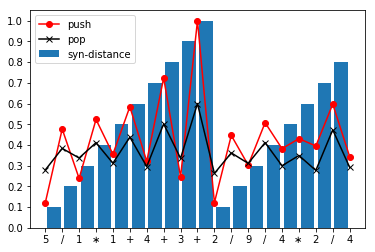

In [74]:
plt.plot(np.arange(seq_len), 
         push,
        label='push',marker='o', color='red')
plt.plot(np.arange(seq_len), 
         pop,
        label='pop',marker='x', color='black')
plt.bar(np.arange(0.5, seq_len-0.5), np.array(syn_dis)/max(syn_dis), label='syn-distance')
plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

'a'

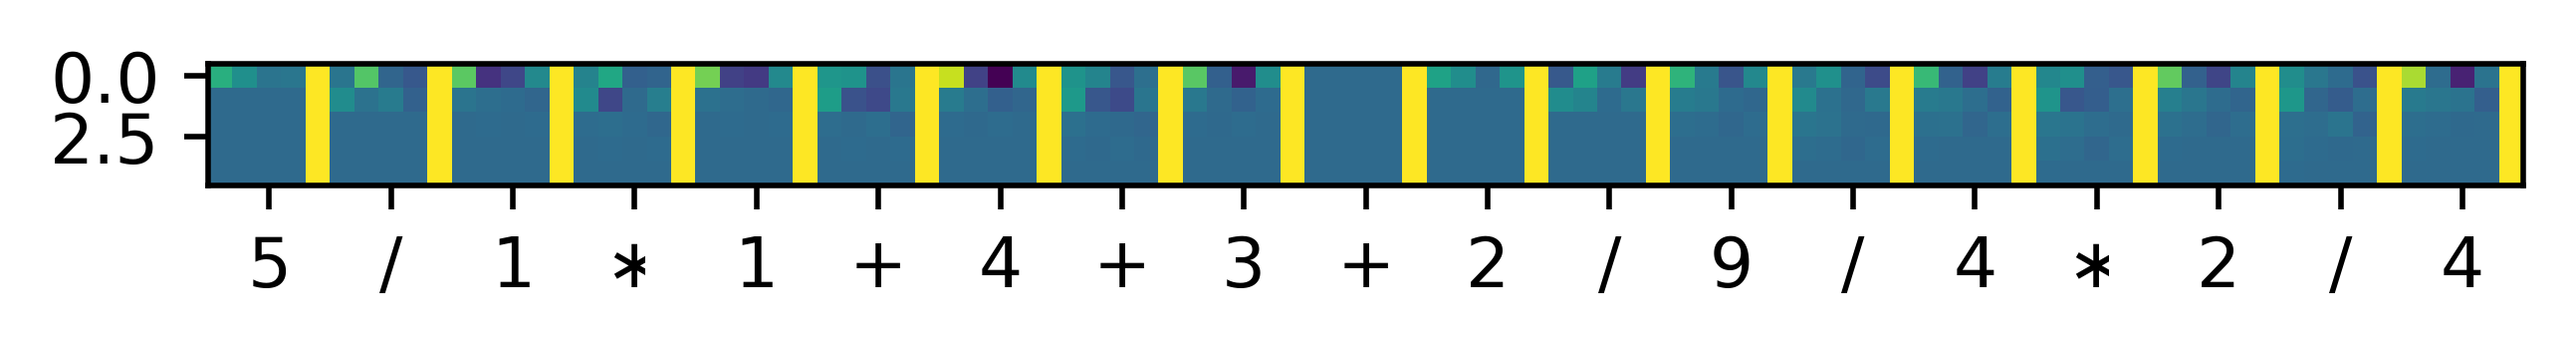

In [162]:
fig, ax = plt.subplots()
fig.dpi = 500
plt.imshow(mem_whole)
plt.xticks(np.arange(2, mem_whole.shape[1], 5), list(seq))
'a'